In [97]:
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import signal
import numpy as np
import torch
import datetime

from src.pipeline.repository import Repository
from src.data.utils import get_annotations_ends
from pyapnea.oscar.oscar_constants import ChannelID


In [130]:
sr = 25
len_respi = 91
#len_respi = 180

def plot_sftf(data, filename=None):
    amp = 2*np.sqrt(2)
    f1, t1, Zxx1 = signal.stft(data, sr, nperseg=len_respi)
    plt.pcolormesh(t1, f1, np.abs(Zxx1), vmin=0, vmax=amp, shading='gouraud')
    plt.title('STFT Magnitude')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    if filename is not None:
        plt.savefig(filename, format='png')
    plt.show()

# https://stackoverflow.com/questions/25735153/plotting-a-fast-fourier-transform-in-python
def plot_fft(data, filename=None):
    N = len(data)
    T = 1.0 / sr
    fft_res = np.fft.fft(data)
    xf = np.fft.fftfreq(N, T)
    firstNedInd = np.argmax(xf < 0)
    freqAxisPos = xf[0:firstNedInd]
    sigFFTPos = fft_res[0:firstNedInd]
    #xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
    fig, ax = plt.subplots()
    ax.set(xlabel='Fréquence')
    ax.plot(freqAxisPos, np.abs(sigFFTPos))    
    if filename is not None:
        plt.savefig(filename, format='pdf')
    plt.show()
    # Phase not really interresting
    # fig2, ax2 = plt.subplots()
    # ax2.plot(freqAxisPos, np.angle(sigFFTPos))
    # plt.show()
    return sigFFTPos, xf

In [99]:
data_repo_path = os.path.join('..', 'data', 'repository')
repo = Repository(data_repo_path)

# RAW Dataset

In [100]:
raw_dataset = repo.load_dataset('1601153a-d0b4-4960-be24-39295454ef96', 'numpy')

In [101]:
print('Nombre de session :', len(raw_dataset))

Nombre de session : 999


In [102]:
x1, y1 = raw_dataset[1]
print(x1.shape)
print(y1.shape)

[4098, 4097, 4099, 4100, 4352]
(615000, 1)
(615000, 1)


In [103]:
x1f = x1.flatten()
y1f = y1.flatten()
print(x1f.shape)
print(y1f.shape)

(615000,)
(615000,)


In [104]:
print('longueur (point)', len(x1), 'longueur (min):', len(x1)*40/1000/60)

longueur (point) 615000 longueur (min): 410.0


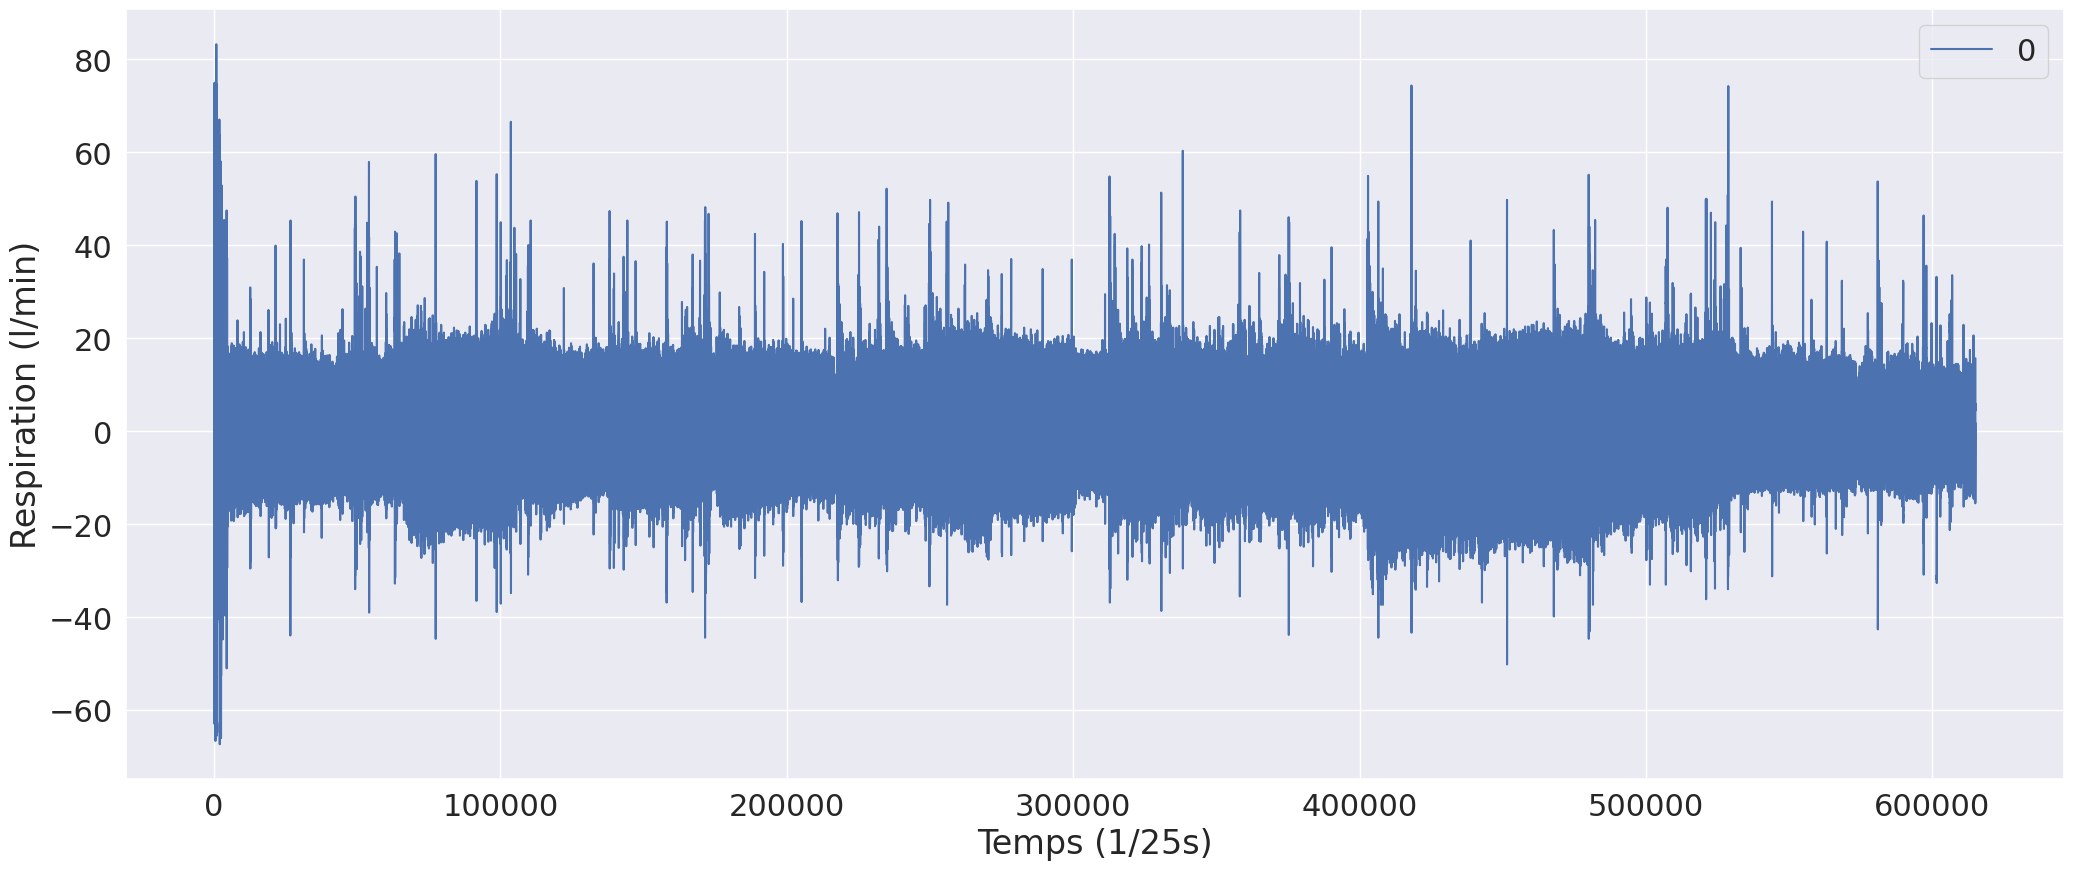

In [105]:
sns.set(rc={'figure.figsize':(25,10)}, font_scale=2)
fig, ax = plt.subplots()
ax.set(xlabel='Temps (1/25s)', ylabel='Respiration (l/min)')
sns.lineplot(x1)
plt.savefig("OneSession.pdf", format='pdf')

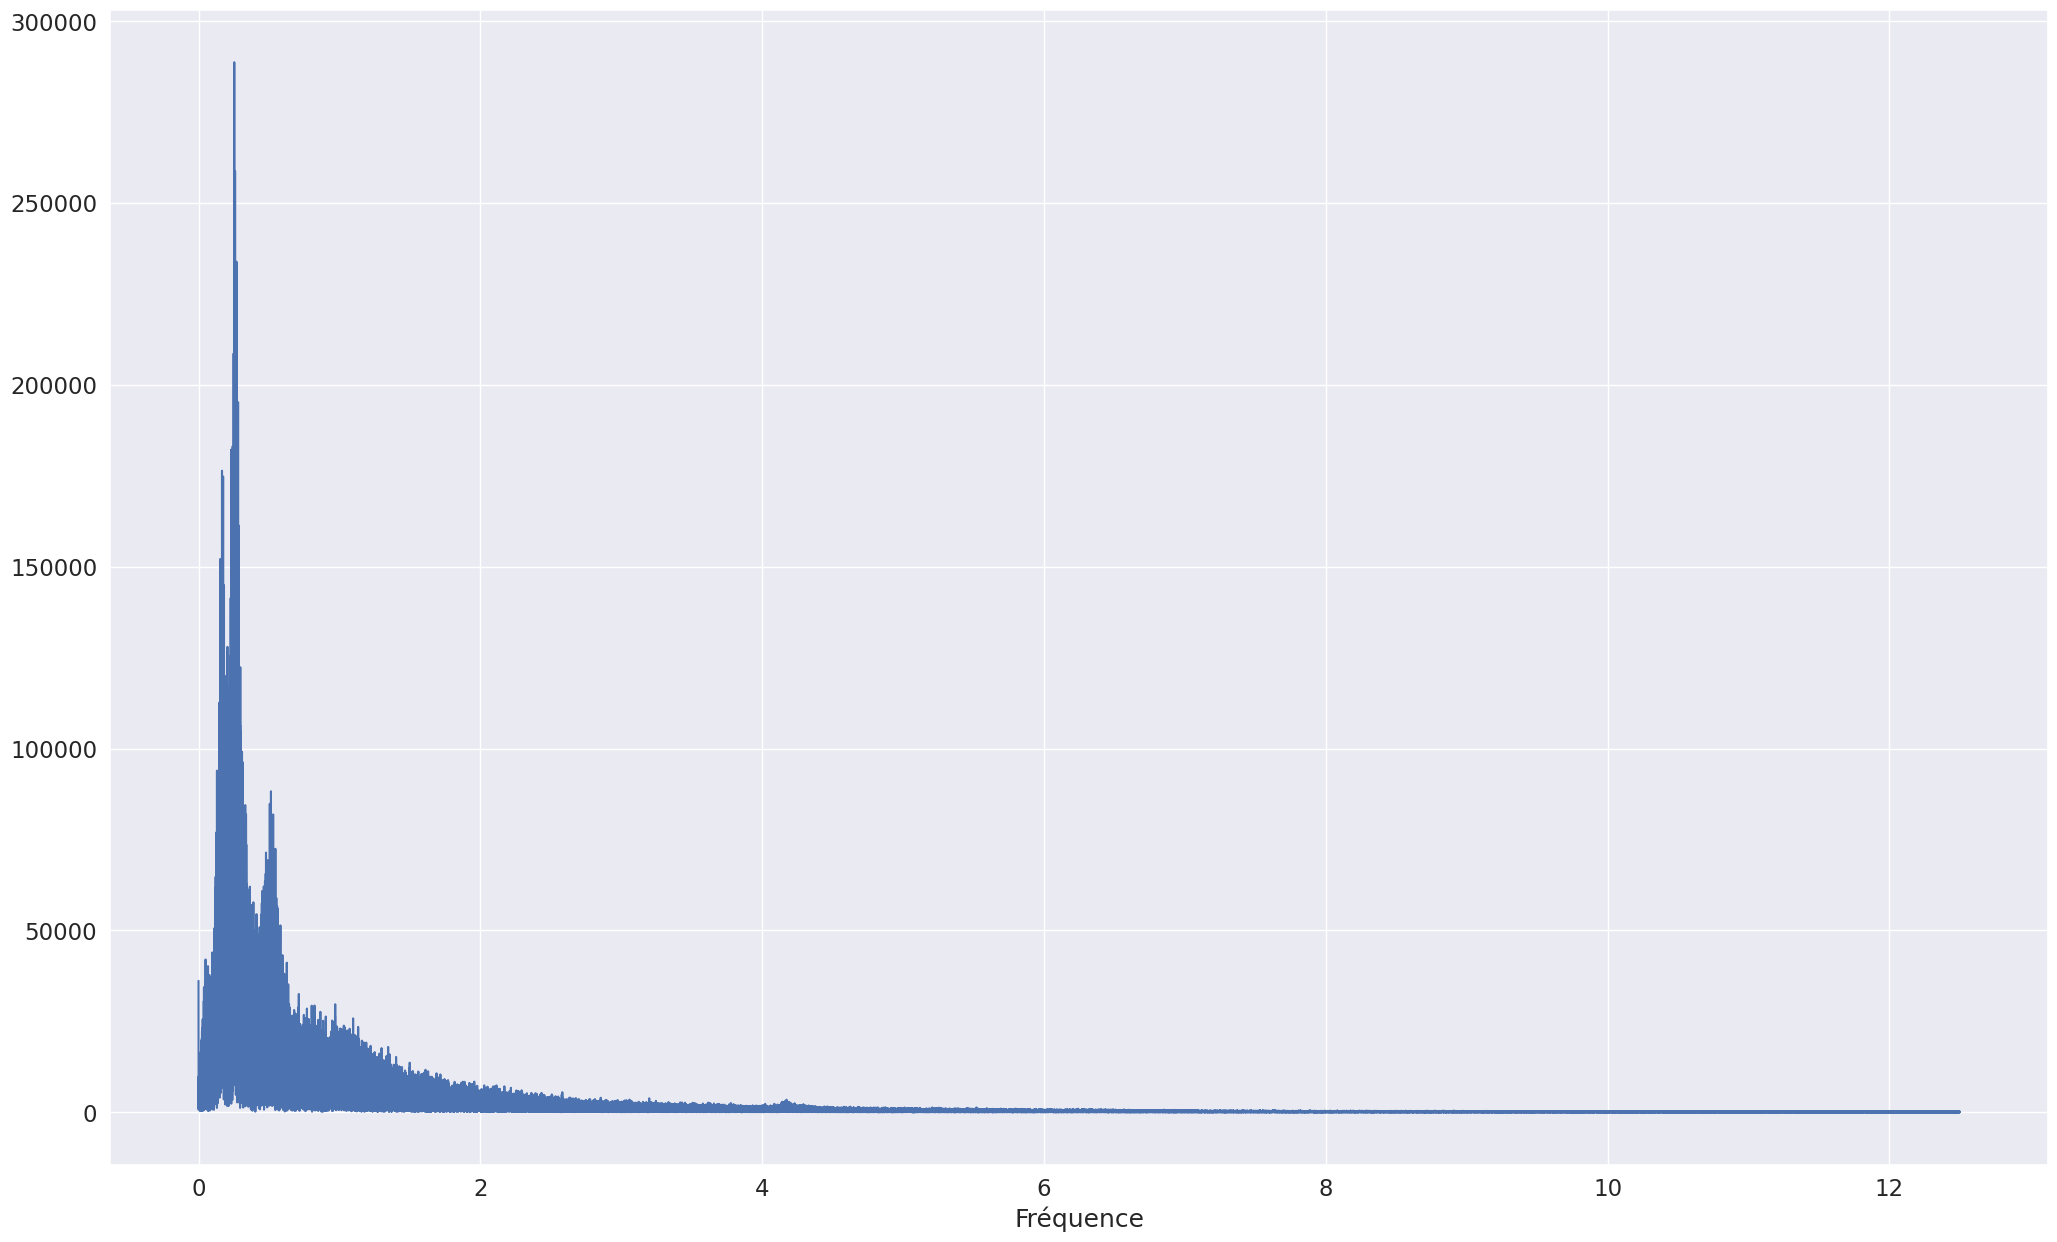

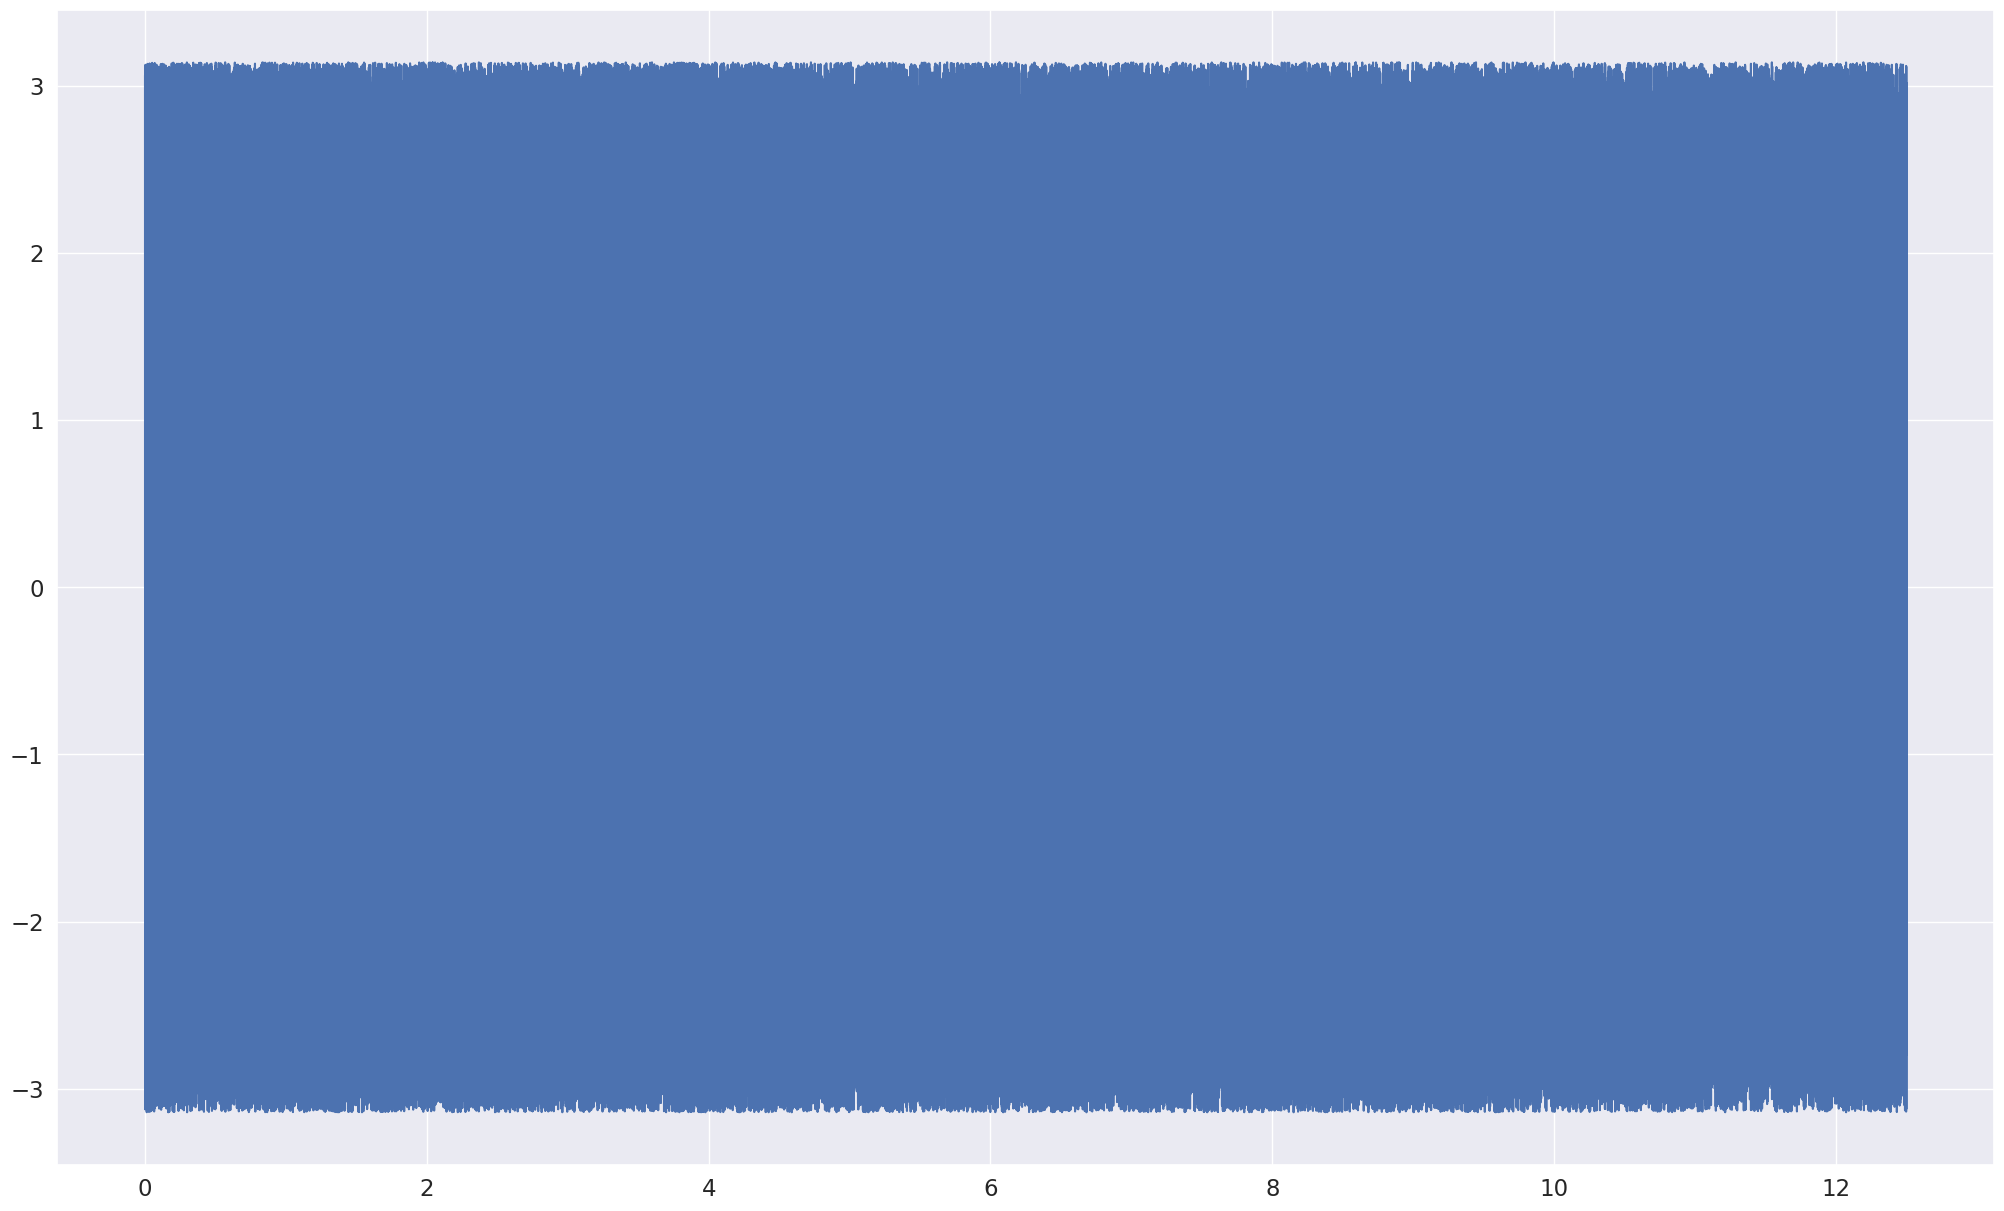

In [131]:
# FFT
fft1, xf1 = plot_fft(x1f, "OneSessionFFT.pdf")

In [107]:
print(len(fft1), len(xf1))
idx_max = np.argmax(np.abs(fft1))
print('frequence respiration', xf1[idx_max])
print('Longueur respiration plus frequente', 1/xf1[idx_max], 's')

307500 615000
frequence respiration 0.25378048780487805
Longueur respiration plus frequente 3.940413262854397 s


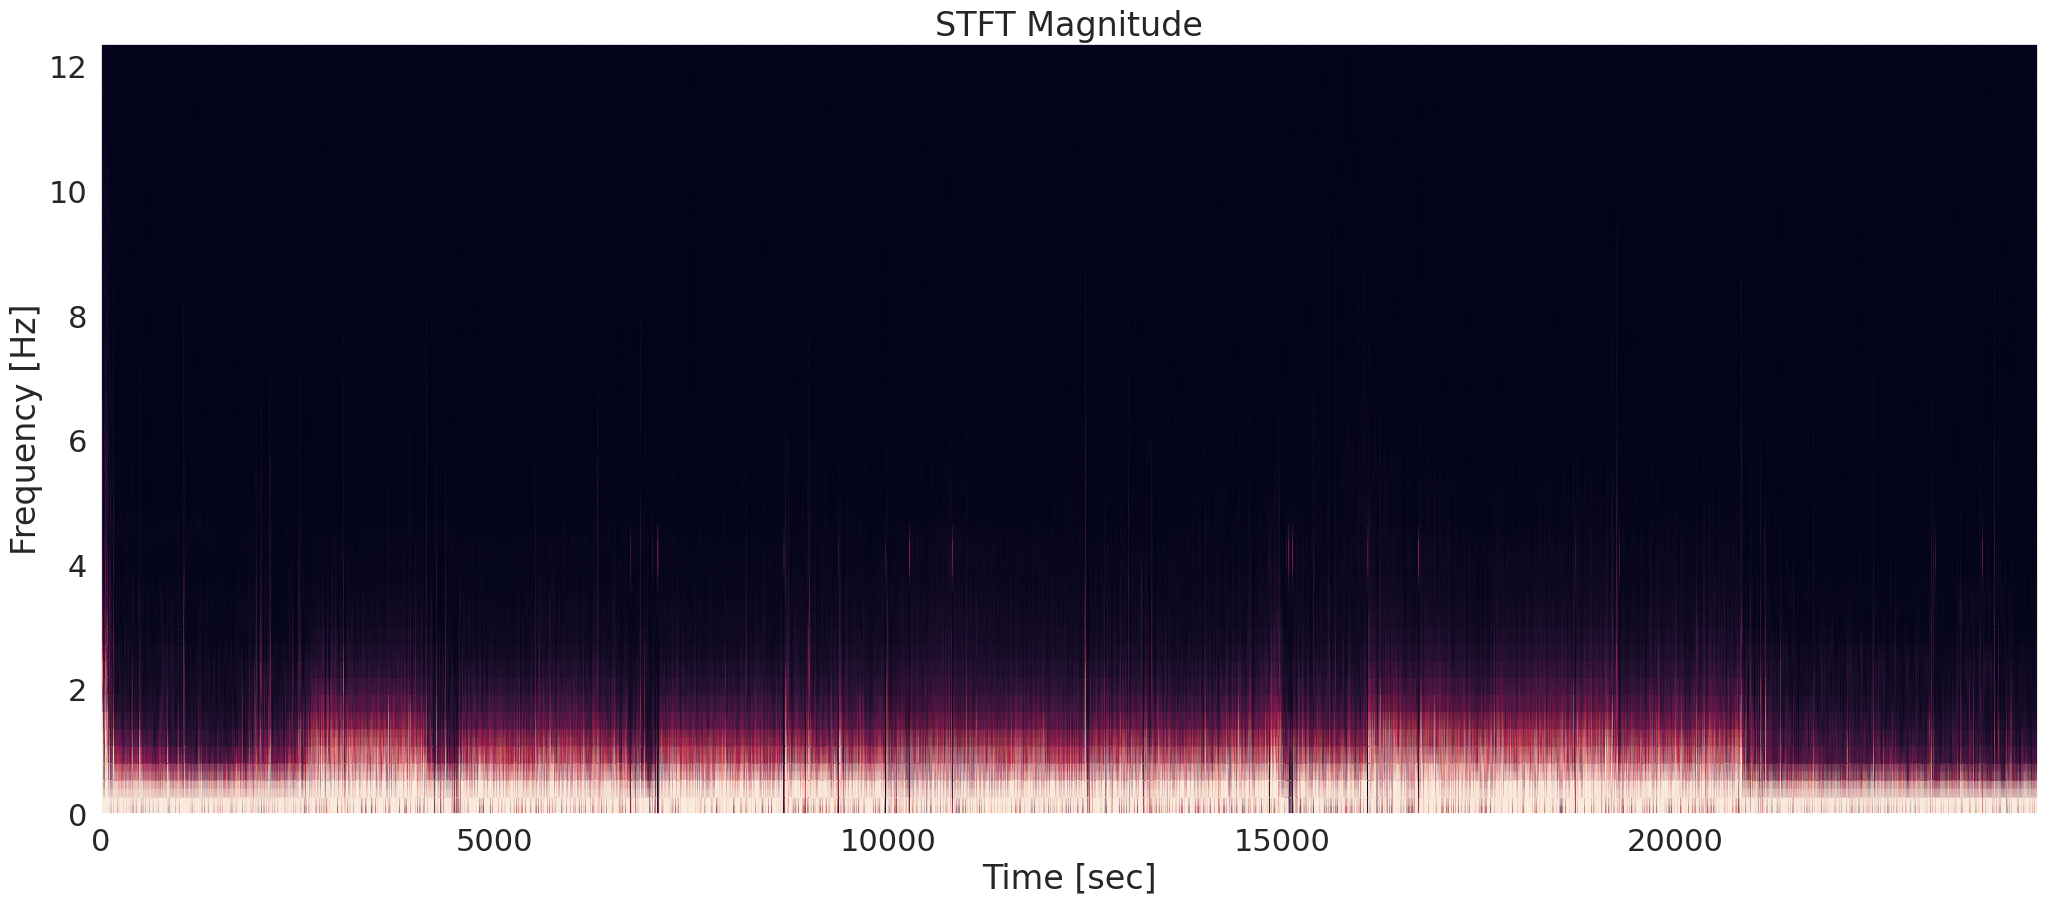

In [108]:
# STFT
plot_sftf(x1f, 'OneSessionSTFT.png')


# Processed Dataset (windowed) (numpy)

In [109]:
windowed_dataset = repo.load_dataset('4a9769fc-3a48-40a7-a54d-e1d7922ee0a8', 'numpy')

In [110]:
print('nombre d''elements:', len(windowed_dataset))

nombre delements: 603126


In [111]:
x2, y2 = windowed_dataset[0]
x2

array([[-12.4800005 ],
       [-11.52000046],
       [-10.56000042],
       [ -9.84000039],
       [ -9.12000036],
       [ -8.16000032],
       [ -7.32000029],
       [ -6.60000026],
       [ -5.64000022],
       [ -4.56000018],
       [ -3.72000015],
       [ -3.36000013],
       [ -3.00000012],
       [ -3.00000012],
       [ -2.4000001 ],
       [ -1.80000007],
       [ -2.04000008],
       [ -2.28000009],
       [ -2.04000008],
       [ -1.80000007],
       [ -1.32000005],
       [ -0.96000004],
       [  0.72000003],
       [  2.76000011],
       [  4.68000019],
       [  7.08000028],
       [  9.36000037],
       [ 11.16000044],
       [ 12.84000051],
       [ 14.04000056],
       [ 15.1200006 ],
       [ 15.72000062],
       [ 16.08000064],
       [ 16.68000066],
       [ 16.92000067],
       [ 17.28000069],
       [ 17.76000071],
       [ 18.12000072],
       [ 18.84000075],
       [ 19.08000076],
       [ 19.68000078],
       [ 20.0400008 ],
       [ 19.80000079],
       [ 19

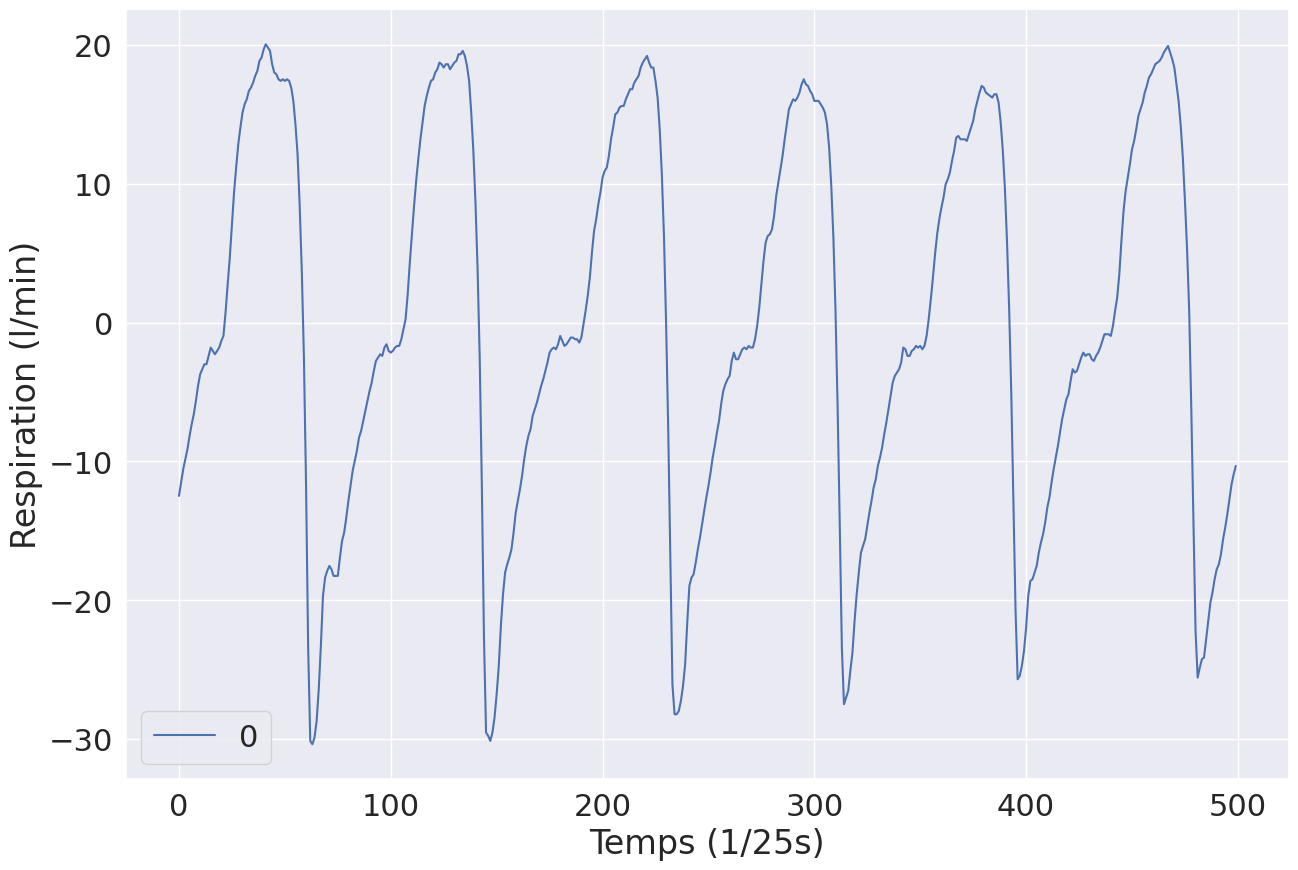

In [112]:
sns.set(rc={'figure.figsize':(15,10)}, font_scale=2)
fig, ax = plt.subplots()
ax.set(xlabel='Temps (1/25s)', ylabel='Respiration (l/min)')
sns.lineplot(x2)
plt.savefig("NormalBreathing.pdf", format='pdf')

In [113]:
x2f = x2.flatten()
y2f = y2.flatten()
print(x2f.shape)
print(y2f.shape)

(500,)
(500,)


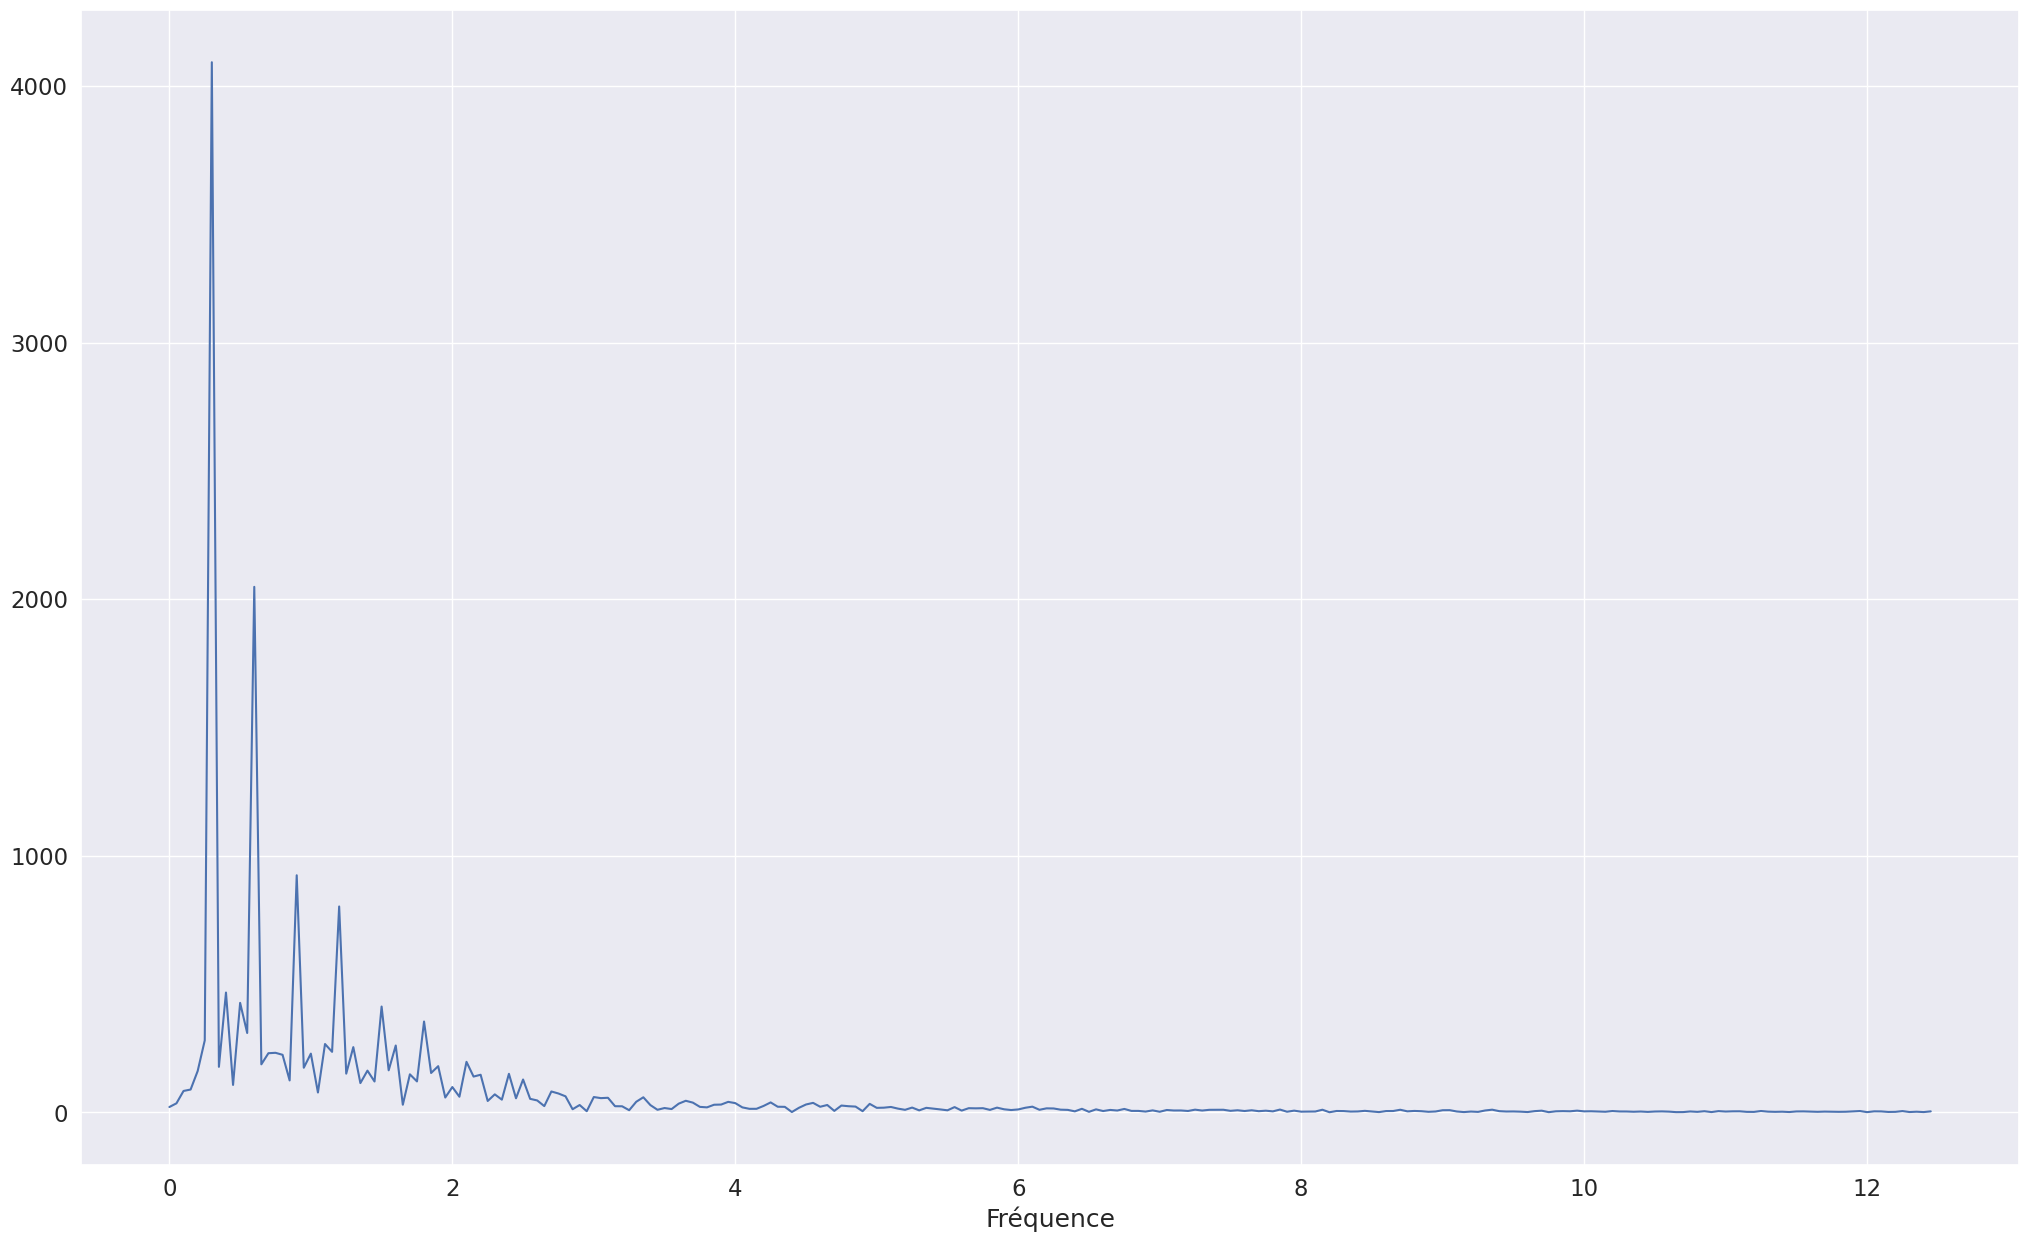

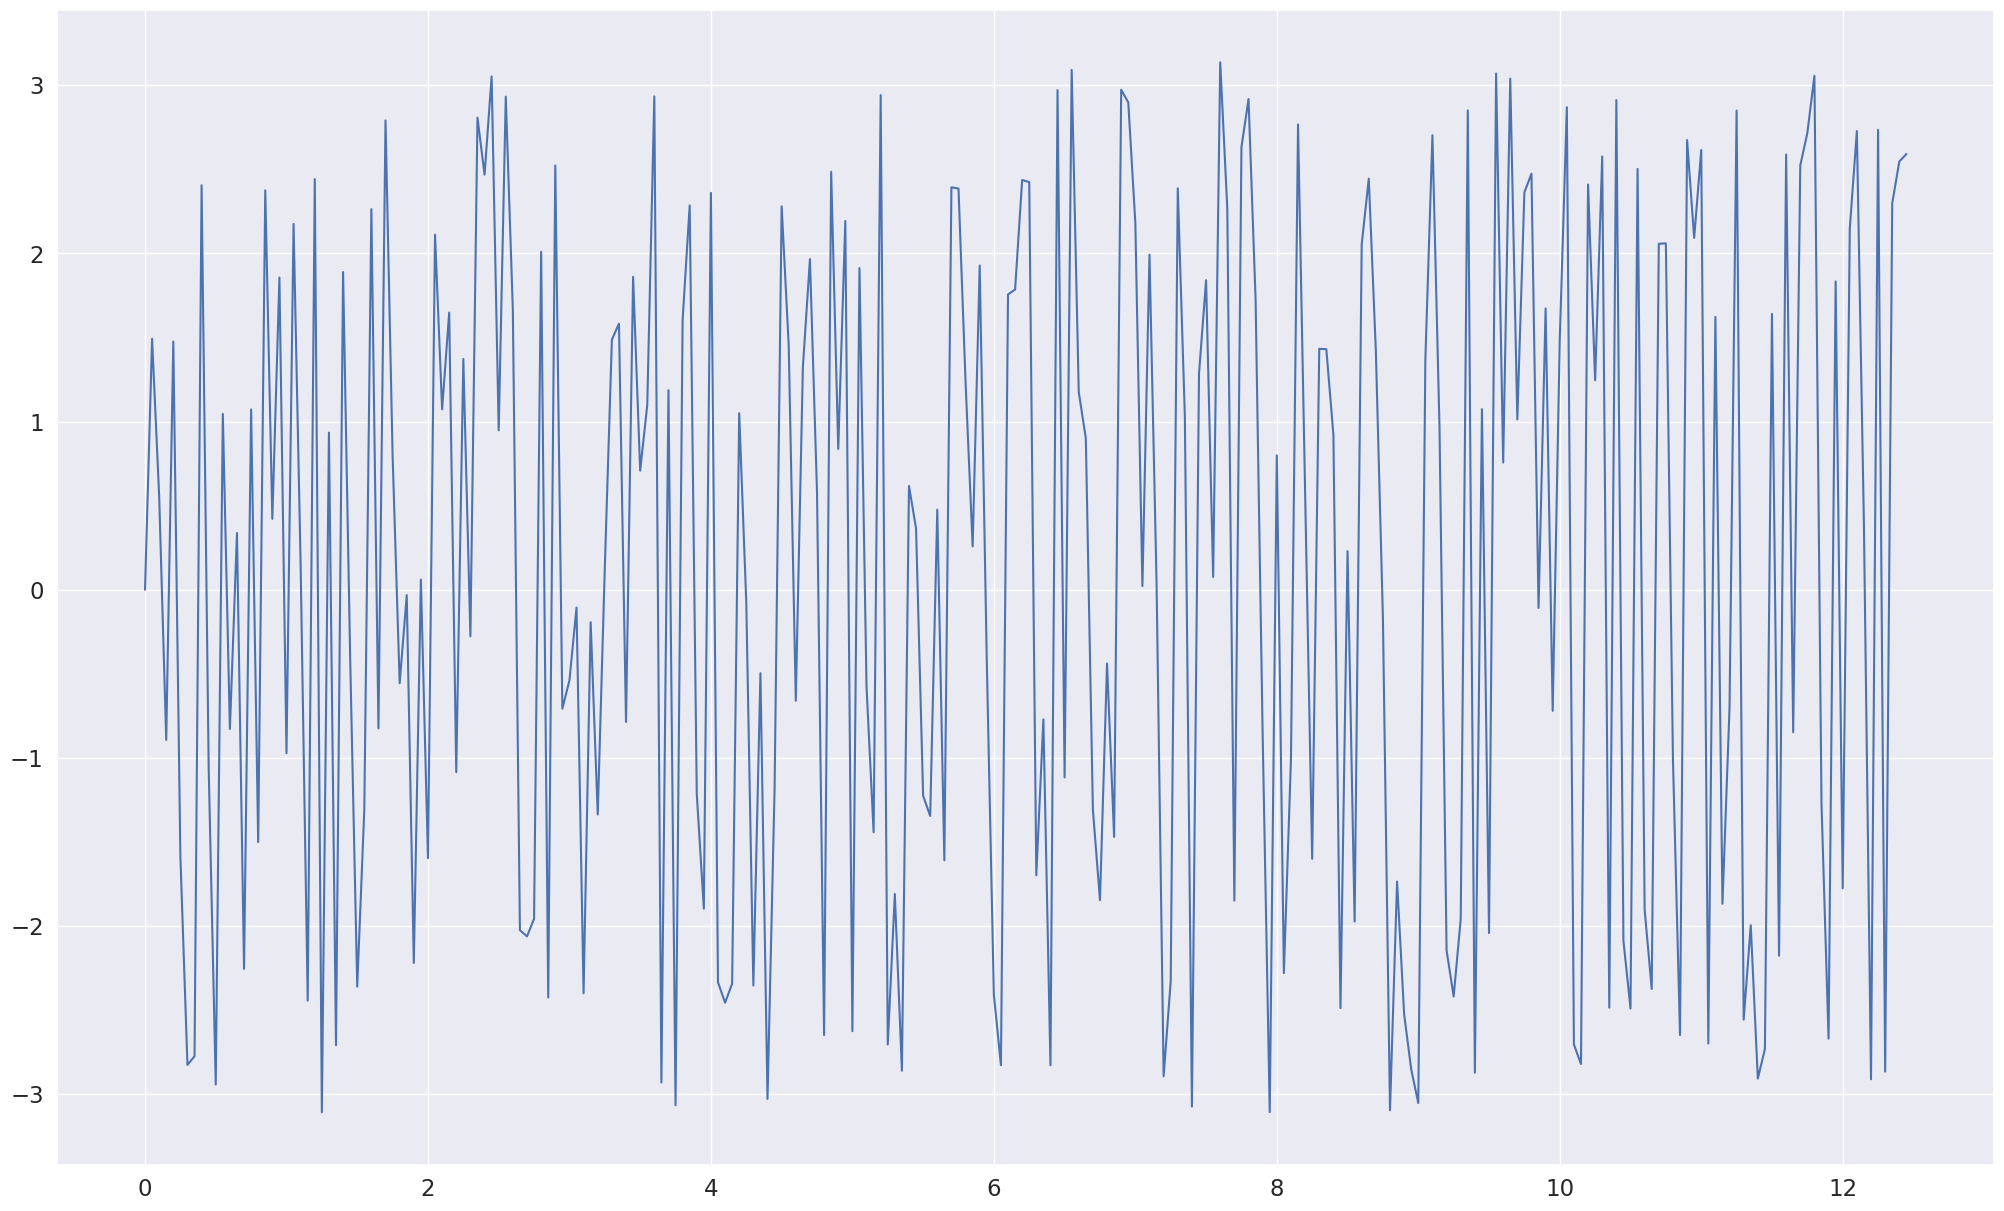

In [132]:
fft2, xf2 = plot_fft(x2f, 'NormalBreathingFFT.pdf')

In [115]:
print(len(fft2), len(xf2))
idx_max2 = np.argmax(np.abs(fft2))
print('frequence respiration', xf2[idx_max2])
print('Longueur respiration plus frequente', 1/xf2[idx_max2], 's')

250 500
frequence respiration 0.30000000000000004
Longueur respiration plus frequente 3.333333333333333 s


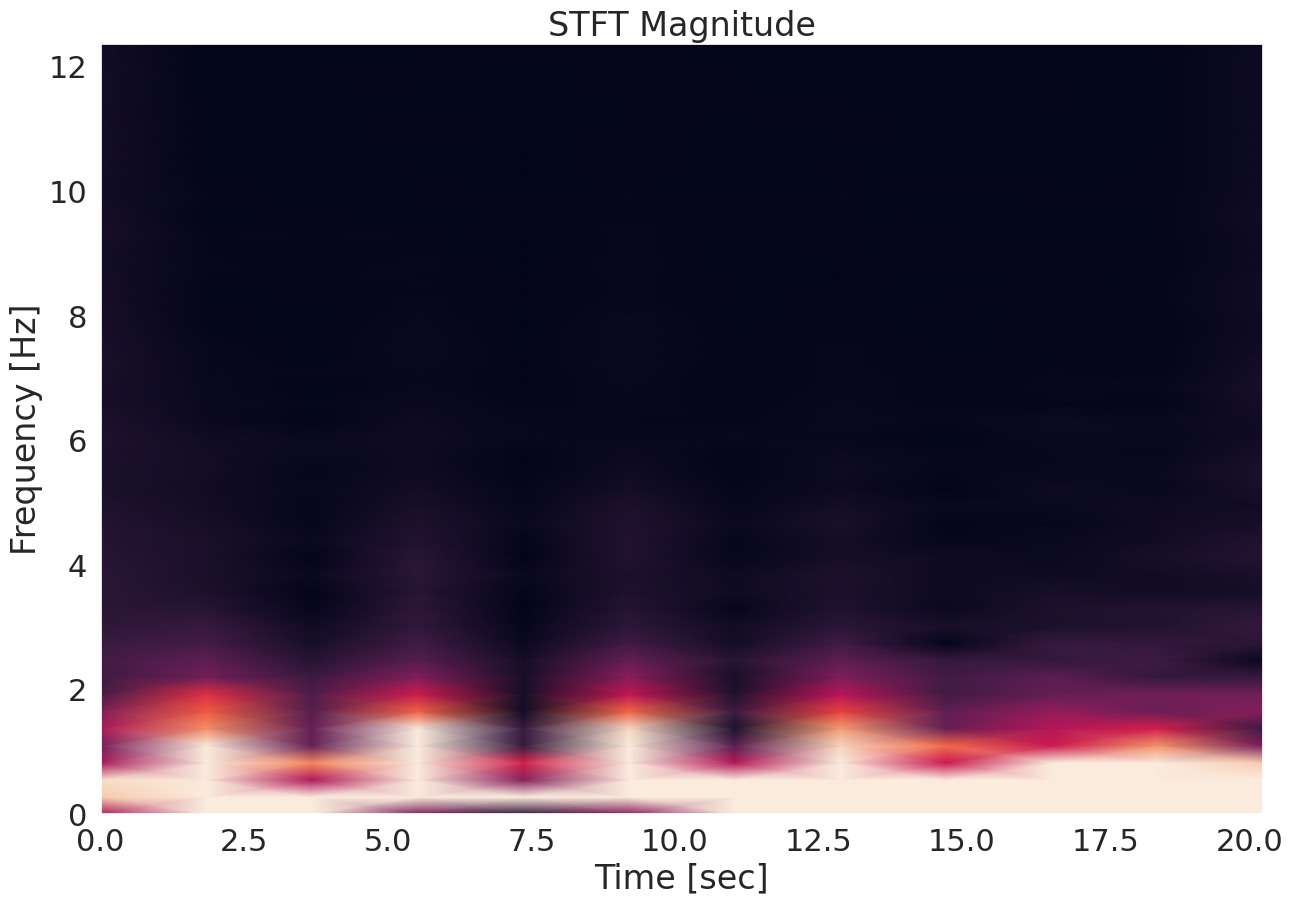

In [116]:
plot_sftf(x2f, 'NormalBreathingSFTF.png')

In [117]:
# find one with apnea event
index_dataset = {}
list_df_annot = []
res = []
with tqdm(total=len(windowed_dataset)) as pbar:
    for x,y in windowed_dataset:
        if 1 in y:
            list_df_annot.append((x,y))
            res.append((x,y))
            if len(res) > 10:
                break
        pbar.update(1)

  0%|          | 0/603126 [00:00<?, ?it/s]

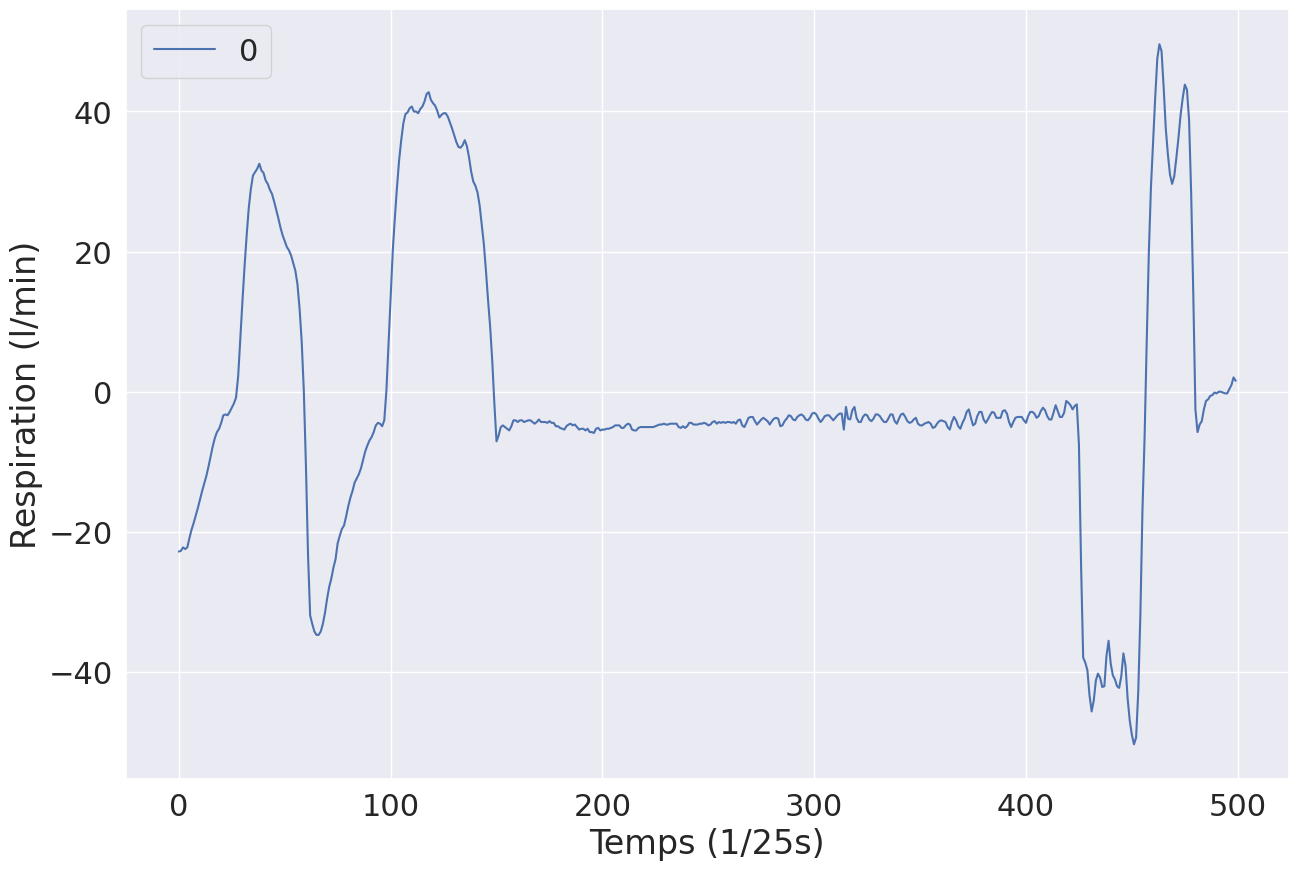

In [118]:
(x3, y3) = res[9]
fig, ax = plt.subplots()
ax.set(xlabel='Temps (1/25s)', ylabel='Respiration (l/min)')
sns.lineplot(x3)
plt.savefig("ApneaBreathing.pdf", format='pdf')

In [119]:
x3f = x3.flatten()
y3f = y3.flatten()

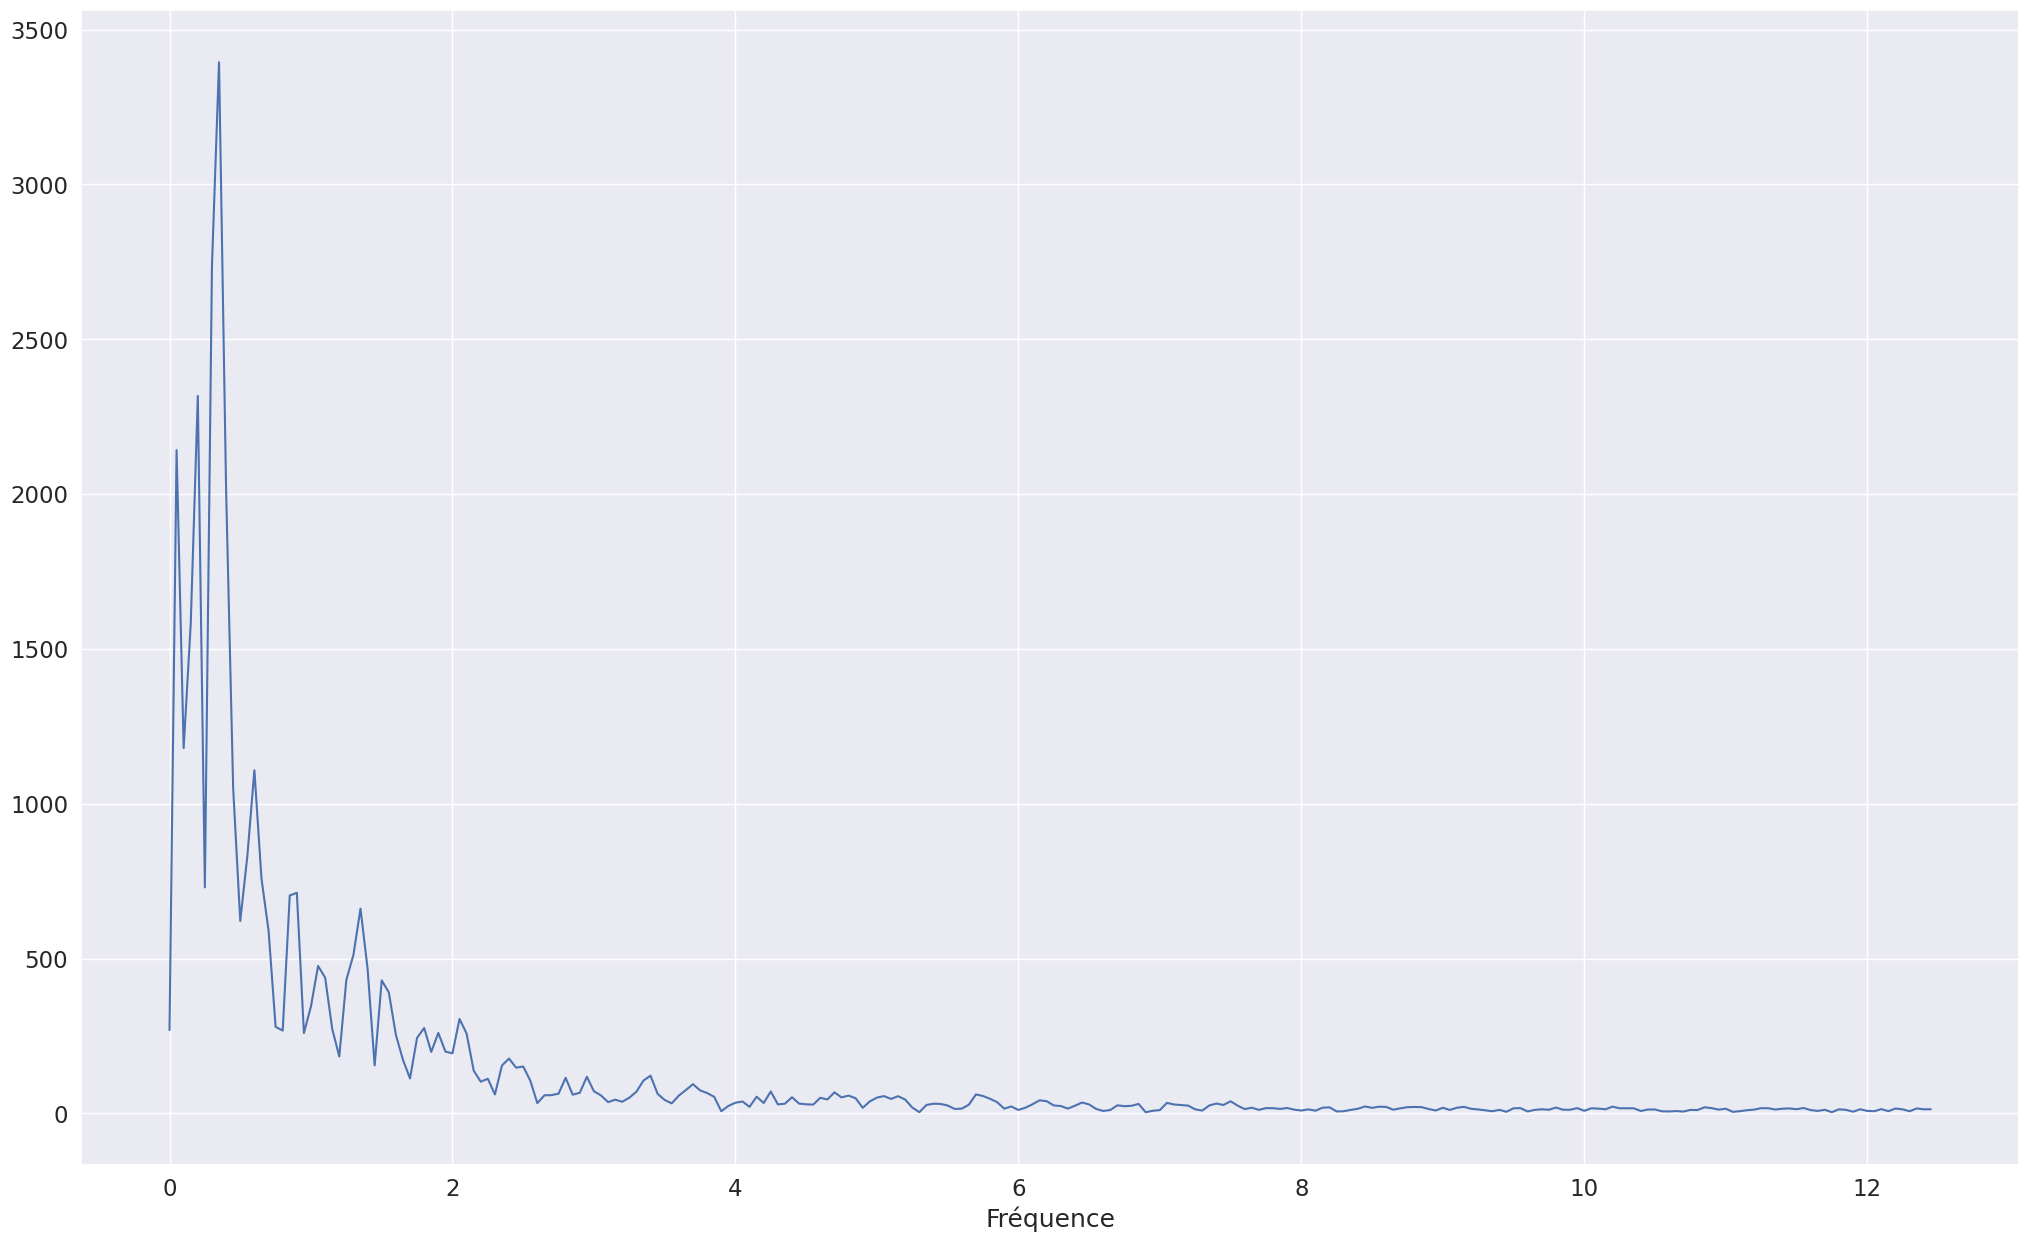

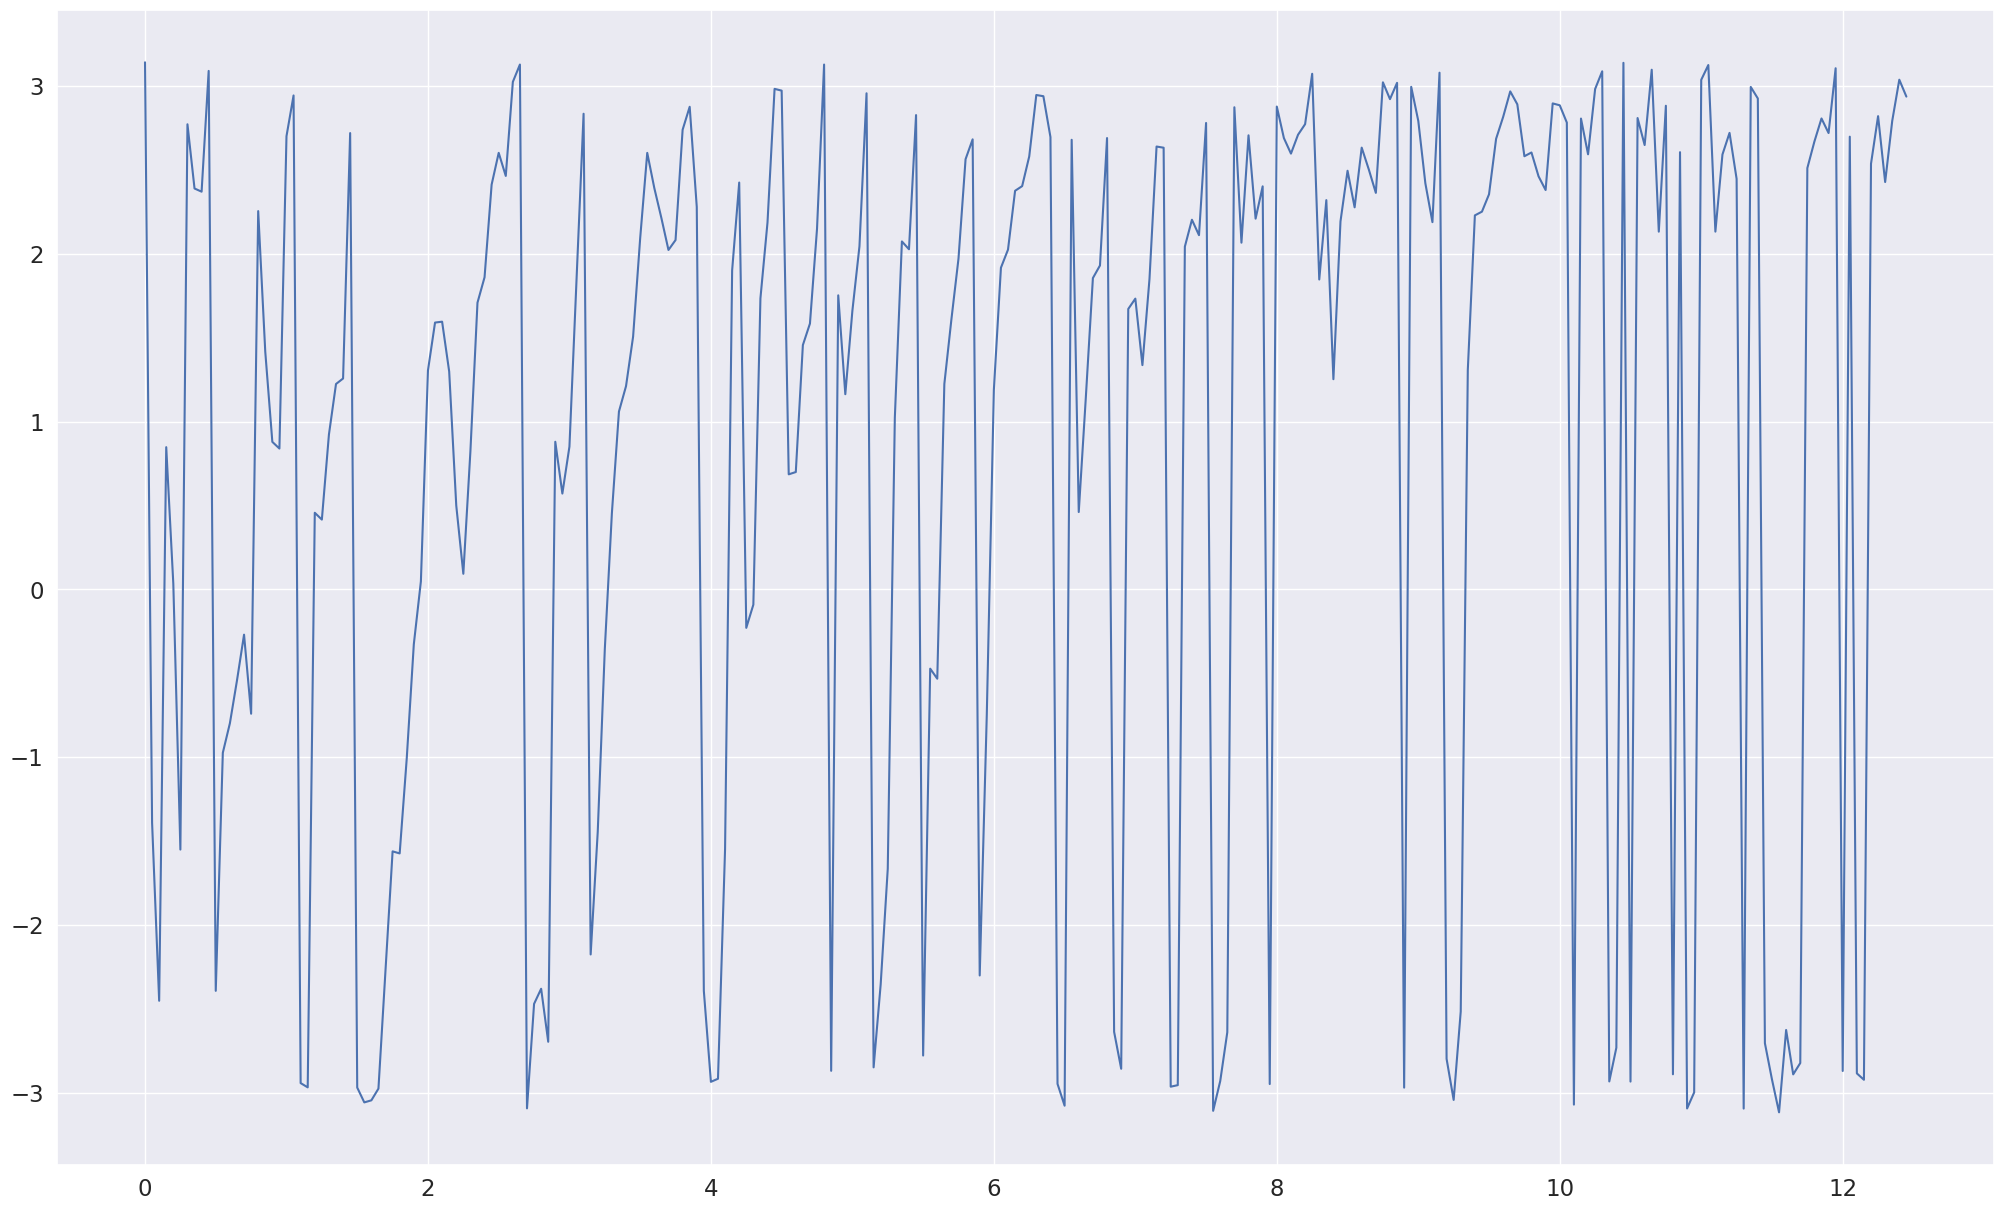

In [133]:
fft3, xf3 = plot_fft(x3f, 'ApneaBreathingFFT.pdf')

In [121]:
idx_max3 = np.argmax(np.abs(fft3))
print('frequence respiration', xf2[idx_max3])
print('Longueur respiration plus frequente', 1/xf2[idx_max3], 's')

250 500
frequence respiration 0.35000000000000003
Longueur respiration plus frequente 2.8571428571428568 s


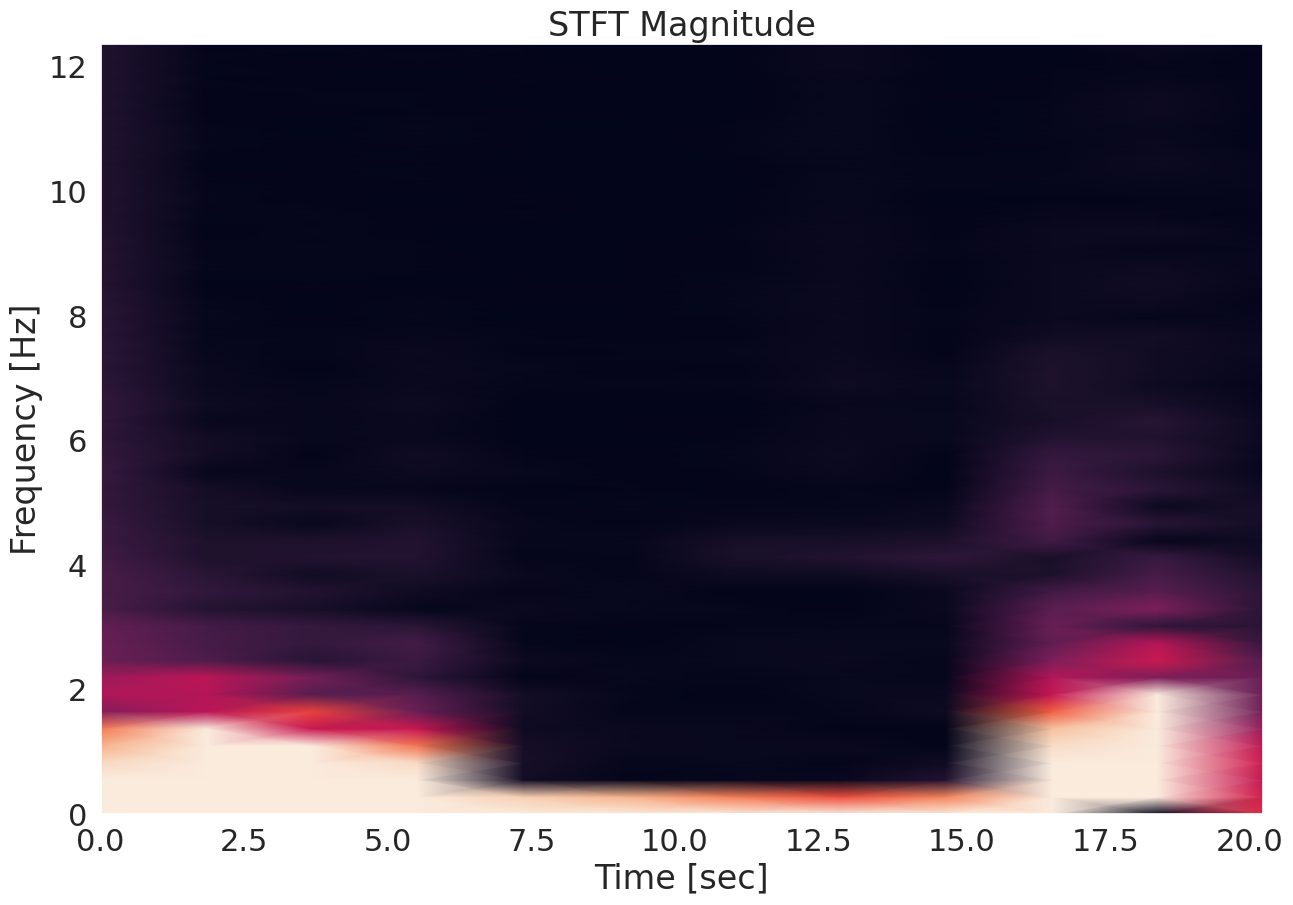

In [122]:
plot_sftf(x3f, 'ApneaBreathingSFTF.png')

# Processed Dataset (windowed) (dataframe)

In [123]:
optional_args = {'channel_ids': [ChannelID.CPAP_FlowRate.value, ChannelID.CPAP_Pressure.value]} 
raw_dataset_df = repo.load_dataset('1601153a-d0b4-4960-be24-39295454ef96', 'dataframe', optional_args)

In [124]:
df1 = raw_dataset_df[0]
df1.reset_index(inplace=True)
df1.sort_values('time_utc', inplace=True)
df1['Pressure'].fillna(method='ffill', inplace=True)

[4098, 4097, 4099, 4100, 4352, 4364]


In [125]:
annot1 = get_annotations_ends(df1)

In [126]:
dfc1 = df1[['FlowRate', 'ApneaEvent', 'Pressure', 'time_utc']]
dfm1 = dfc1.melt('time_utc', var_name='cols', value_name='vals')
dfm1

time_utc      cols       vals
0            2022-01-27 01:56:19+00:00  FlowRate  69.480003
1     2022-01-27 01:56:19.040000+00:00  FlowRate  66.360003
2     2022-01-27 01:56:19.080000+00:00  FlowRate  64.200003
3     2022-01-27 01:56:19.120000+00:00  FlowRate  61.680002
4     2022-01-27 01:56:19.160000+00:00  FlowRate  59.760002
...                                ...       ...        ...
22495 2022-01-27 02:01:18.800000+00:00  Pressure   5.680000
22496 2022-01-27 02:01:18.840000+00:00  Pressure   5.680000
22497 2022-01-27 02:01:18.880000+00:00  Pressure   5.680000
22498 2022-01-27 02:01:18.920000+00:00  Pressure   5.680000
22499 2022-01-27 02:01:18.960000+00:00  Pressure   5.680000

[22500 rows x 3 columns]

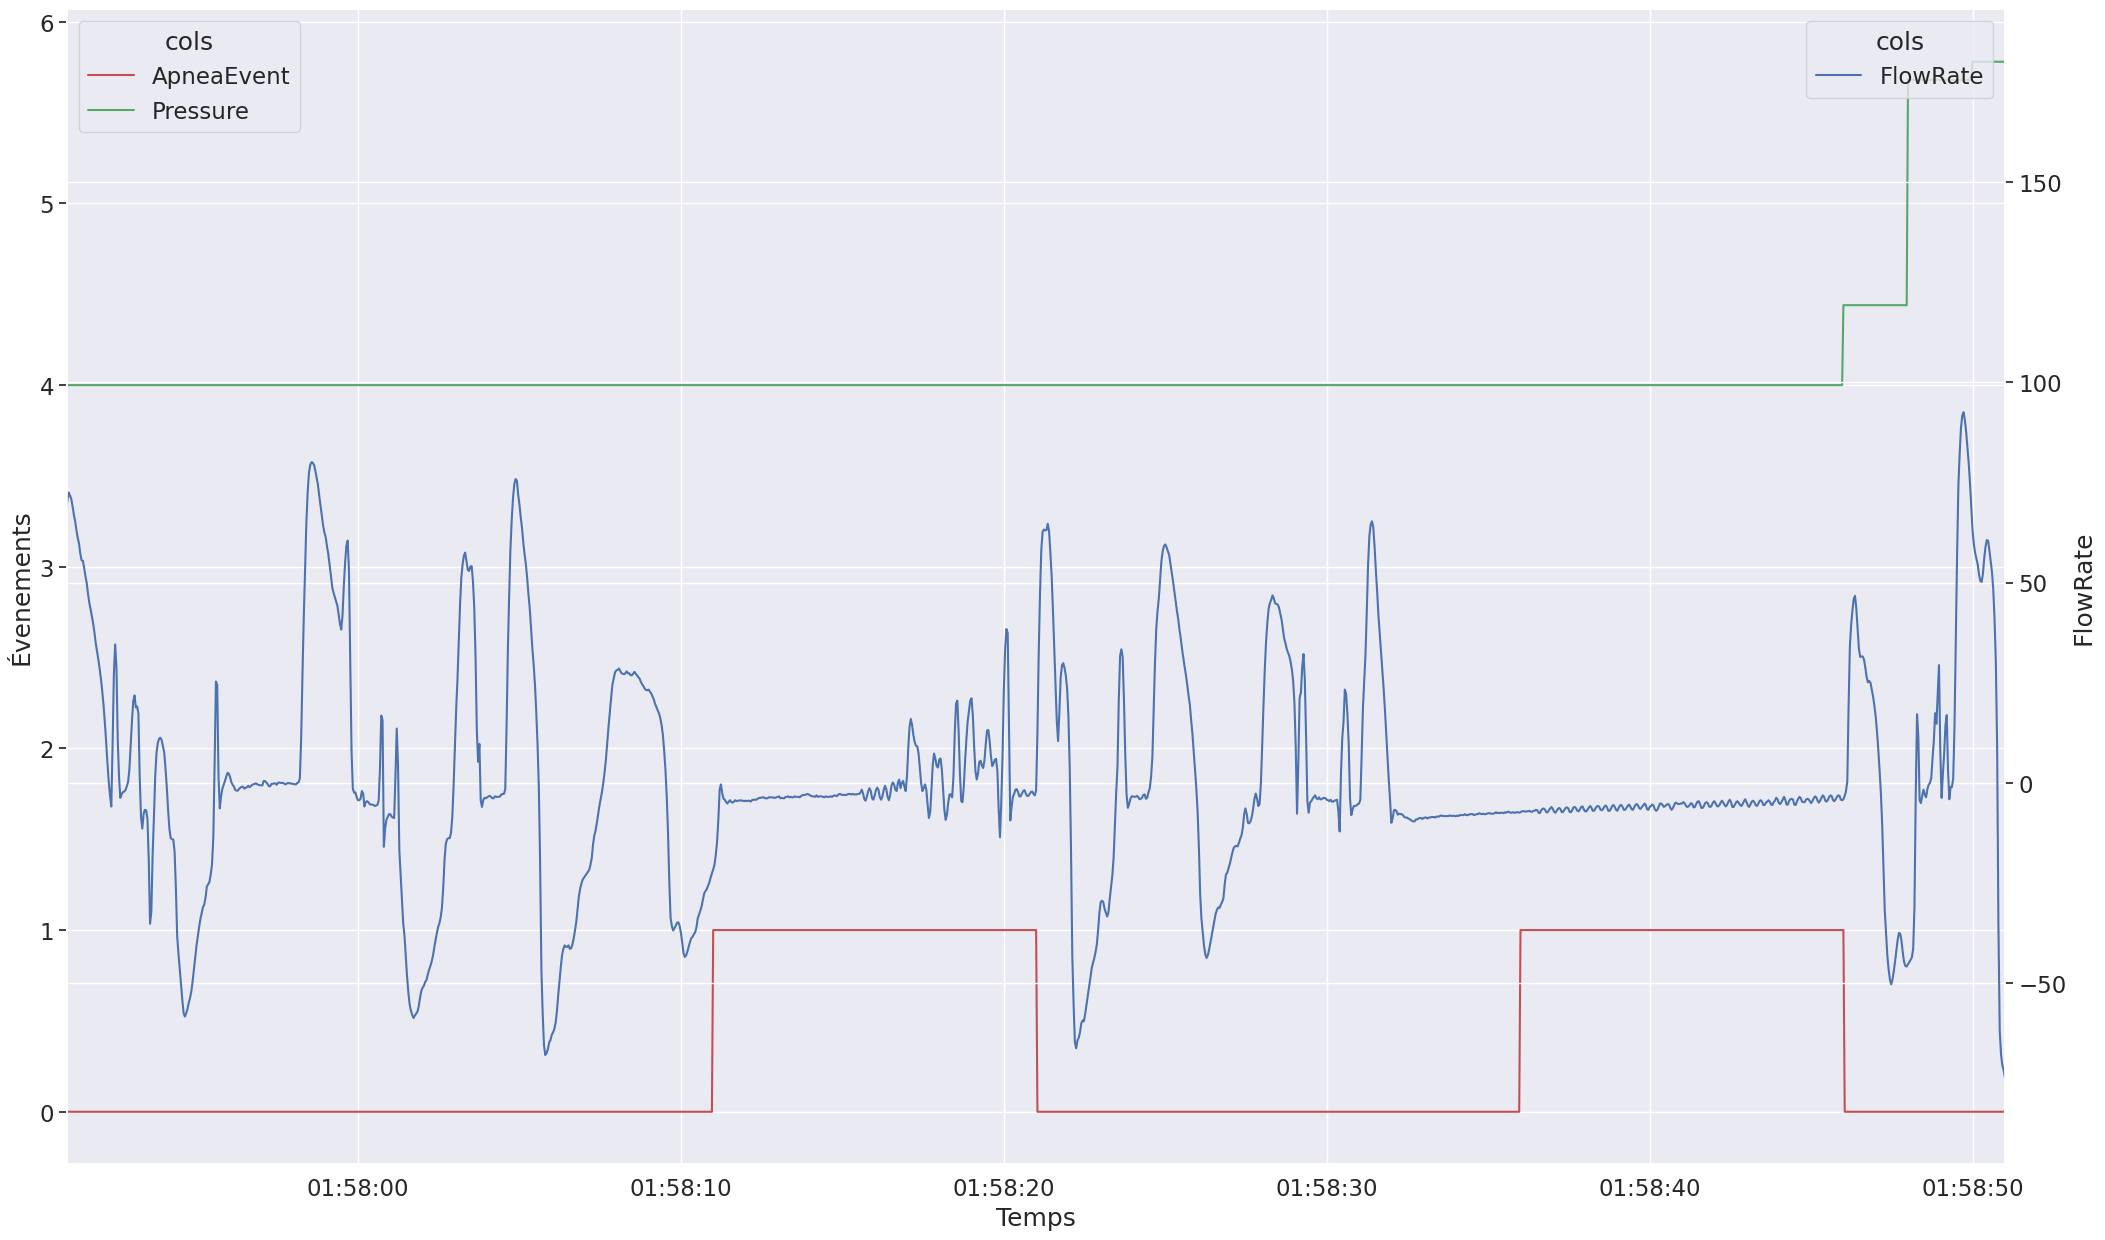

In [127]:
event_time = annot1['time_utc'].iloc[0]
sns.set(rc={'figure.figsize':(25,15)}, font_scale=1.5)
fig, ax = plt.subplots()

#ax.set_ylim(-40, 50)
ax.set_xlim(event_time - datetime.timedelta(seconds=30), event_time + datetime.timedelta(seconds=30))
ax.set(xlabel='Temps', ylabel='Évenements')
sns.lineplot(data=dfm1[dfm1['cols']!='FlowRate'],x='time_utc', y='vals', hue='cols', palette=['r', 'g'], ax = ax)
ax2 = ax.twinx()
ax2.set(xlabel='Temps', ylabel='FlowRate')
# warning : should not interpolate between points...
sns.lineplot(data=dfm1[dfm1['cols']=='FlowRate'],x='time_utc', y='vals', hue='cols', palette=['b'], ax = ax2)
# for a in annot1['time_utc']:
#    plt.axvline(x=a, color='r', linewidth=3)
plt.savefig("PressureExplained.pdf", format='pdf')

# PCA sur le signal fenetré

In [212]:
pi_winds = repo.load_dataset('2041cb8a-11e7-472e-93e1-ad3af8d2c344', 'numpy')
np_ds = np.array(pi_winds)
X = np_ds[:,0,:,:]
Y = np_ds[:,1,:,:]
X = X.reshape((X.shape[0],X.shape[1]))
Y = Y.reshape((Y.shape[0],Y.shape[1]))
print(X.shape, Y.shape)

(8000, 500) (8000, 500)


In [213]:
Yc = Y.sum(axis=1)
print(Yc.shape)

(8000,)


In [214]:
Yc[Yc>=1] = 1
print(len(Yc[Yc==1]))

4000


In [215]:
print(X[0])

[ 12.4800005  12.84       13.320001   13.92       14.880001   15.120001
  15.84       16.08       16.32       16.44       16.92       17.04
  17.52       18.         18.480001   18.960001   19.44       19.560001
  19.560001   19.560001   19.08       18.240002   17.04       15.84
  14.52       12.72       10.440001    7.0800004   3.         -3.2400002
 -10.92      -17.04      -19.560001  -21.240002  -21.240002  -20.76
 -20.52      -20.16      -20.04      -19.560001  -19.2       -18.720001
 -17.76      -17.400002  -17.16      -16.68      -15.960001  -15.360001
 -14.64      -14.160001  -13.440001  -12.960001  -12.6       -11.88
 -11.040001  -10.440001   -9.72       -9.         -8.16       -7.32
  -6.6000004  -6.         -5.76       -5.28       -4.44       -3.7200003
  -3.96       -4.32       -4.32       -3.96       -2.7600002  -1.32
   0.          1.2         2.64        4.8         6.7200003   8.400001
   9.84       11.040001   11.88       12.6        13.080001   13.8
  14.160001   14.16

In [252]:
# https://machinelearningmastery.com/principal-component-analysis-for-visualization/
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.01)
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])

Xt = pipe.fit_transform(X)

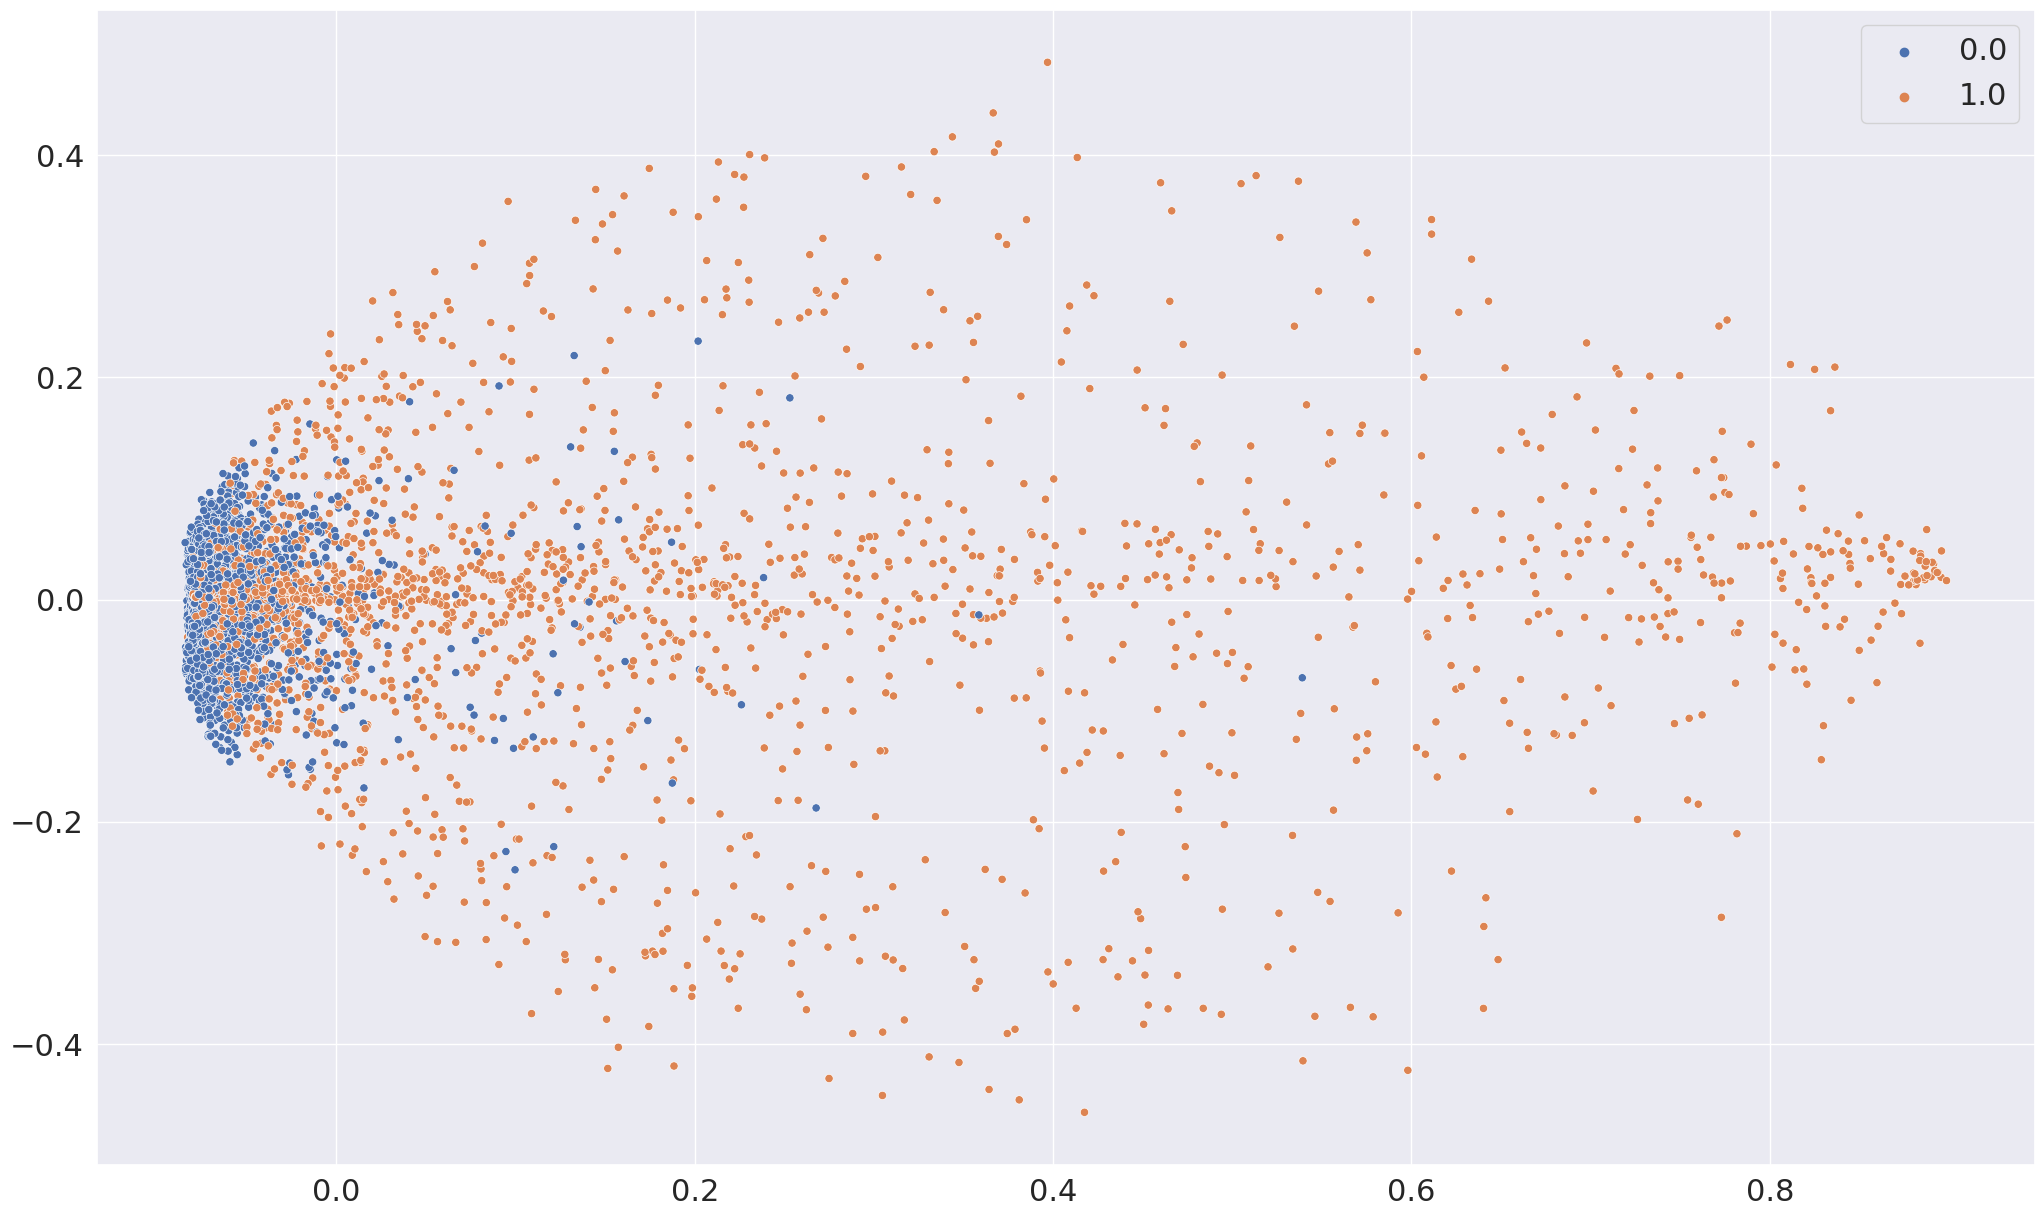

In [257]:
sns.set(rc={'figure.figsize':(25,15)}, font_scale=2)
sns.scatterplot(x=Xt[:,0], y=Xt[:,1], hue=Yc)
plt.savefig("KernelPCA.pdf", format='pdf')
plt.show()

# Analyse des matrices confusion

In [260]:
y = [0, 0, 0 , 1]
yh = [1, 0 , 0, 1]
from sklearn.metrics import confusion_matrix

c = confusion_matrix(y, yh)
print(c)

[[2 1]
 [0 1]]


In [259]:
c

array([[2, 1],
       [0, 1]])